In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

### O Dataset cresci-rtbust-2019_tweets.json contem usuários do twitter manualmente marcados como contas Humanas e Bots

###### fonte: https://botometer.iuni.iu.edu/bot-repository/datasets.html

In [174]:
# read twitter dataset 
df = pd.read_json('data/cresci-rtbust-2019/cresci-rtbust-2019_tweets.json')
df.head()

,created_at,user
0,2019-05-15 16:00:19+00:00,"{'id': 3022357312, 'id_str': '3022357312', 'na..."
1,2019-05-16 20:07:35+00:00,"{'id': 753659579582541824, 'id_str': '75365957..."
2,2019-05-17 17:22:28+00:00,"{'id': 901802279623417856, 'id_str': '90180227..."
3,2018-09-24 13:01:10+00:00,"{'id': 2982392825, 'id_str': '2982392825', 'na..."
4,2019-05-15 16:41:07+00:00,"{'id': 825436422609969152, 'id_str': '82543642..."


In [175]:
# convert json data to flat table
df_twitter_users = pd.json_normalize(data=df['user'])
df_twitter_users.head()

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,entities.url.urls
0,3022357312,3022357312,patatavis,pattavis,,,None,False,218,285,...,True,False,True,False,False,False,False,none,[],NaN
1,753659579582541824,753659579582541824,#1DMITAMProject ♡ #OneDirectionBestFans,PromotingLouisT,Italy,➡ here we promote all of the boys' music 🐼💖\n\...,https://t.co/8HvscWygQd,False,256,358,...,True,False,True,False,False,False,False,none,[],"[{'url': 'https://t.co/8HvscWygQd', 'expanded_..."
2,901802279623417856,901802279623417856,Anna 05600885,Anna10mila,"Milano, Lombardia",Sii il cambiamento,None,False,287,346,...,True,False,True,False,False,False,False,none,[],NaN
3,2982392825,2982392825,Hanna,AlleHanna,,,None,False,266,354,...,True,False,True,False,False,False,False,none,[],NaN
4,825436422609969152,825436422609969152,Zaffiro Blu,ZaffiroBlu3,,Se puoi sognarlo puoi farlo 💙,None,False,286,564,...,True,False,True,False,False,False,False,none,[],NaN


### O Dataset acompanha um arquivo de classificação (bot/humano).
##### Necessário realizar um JOIN pelo ID do usuário entre os 2 datasets

In [176]:
# read calssification dataset (tab separated)
column_list = ['id','classification']
df_user_calssification = pd.read_csv('data/cresci-rtbust-2019/cresci-rtbust-2019.tsv', sep='\t', names = column_list)

In [112]:
df_user_calssification.head()

,id,classification
0,3039154799,human
1,390617262,bot
2,4611389296,human
3,734396807745286145,human
4,1010978324569640960,bot


In [350]:
df_user_calssification.shape

(759, 2)

In [101]:
df_twitter_users.shape

(693, 43)

In [177]:
df_twitter_users = df_twitter_users.set_index('id').join(df_user_calssification.set_index('id'))

In [179]:
df_twitter_users.head()

,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,entities.url.urls,classification
id,,,,,,,,,,,,,,,,,,,,,
3022357312,3022357312,patatavis,pattavis,,,None,False,218,285,0,...,False,True,False,False,False,False,none,[],NaN,bot
753659579582541824,753659579582541824,#1DMITAMProject ♡ #OneDirectionBestFans,PromotingLouisT,Italy,➡ here we promote all of the boys' music 🐼💖\n\...,https://t.co/8HvscWygQd,False,256,358,0,...,False,True,False,False,False,False,none,[],"[{'url': 'https://t.co/8HvscWygQd', 'expanded_...",bot
901802279623417856,901802279623417856,Anna 05600885,Anna10mila,"Milano, Lombardia",Sii il cambiamento,None,False,287,346,3,...,False,True,False,False,False,False,none,[],NaN,human
2982392825,2982392825,Hanna,AlleHanna,,,None,False,266,354,0,...,False,True,False,False,False,False,none,[],NaN,bot
825436422609969152,825436422609969152,Zaffiro Blu,ZaffiroBlu3,,Se puoi sognarlo puoi farlo 💙,None,False,286,564,0,...,False,True,False,False,False,False,none,[],NaN,bot


### Confirmar se todos os usuarios possuem classificação

In [186]:
df_twitter_users['classification'].value_counts()

bot      353
human    340
Name: classification, dtype: int64

# Analise das variáveis

In [403]:
df_twitter_users.keys()

Index(['id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'protected', 'followers_count', 'friends_count', 'listed_count',
       'created_at', 'favourites_count', 'utc_offset', 'time_zone',
       'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'has_extended_profile',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'translator_type',
       'entities.description.urls', 'entities.url.urls', 'classification'],
      dtype='object')

## followers_count
### The number of followers this account currently has

In [606]:
df_twitter_users['followers_count'].describe()

count       693.000000
mean       2022.906205
std       14874.114129
min           0.000000
25%         119.000000
50%         286.000000
75%         627.000000
max      310877.000000
Name: followers_count, dtype: float64

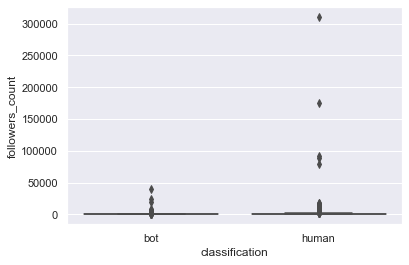

In [646]:
sns.set(style="darkgrid")
sns.boxplot(x= df_twitter_users['classification'], y= df_twitter_users['followers_count']); 

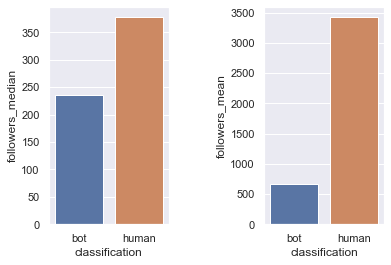

In [608]:
fig, axs = plt.pyplot.subplots(1,2);
plt.pyplot.subplots_adjust(wspace = 0.8);

# Mediana
sns.barplot(x= 'classification', y= 'followers_median', ax=axs[0],
    data=(df_twitter_users
              .groupby(['classification'])
              .agg(followers_median = ('followers_count','median'))
              .reset_index()
        )
    );

# Media
sns.barplot(x= 'classification', y= 'followers_mean', ax=axs[1],
    data=(df_twitter_users
              .groupby(['classification'])
              .agg(followers_mean = ('followers_count','mean'))
              .reset_index()
        )
    );

## default_profile_image
### When true, indicates that the user has not uploaded their own profile image and a default image is used instead

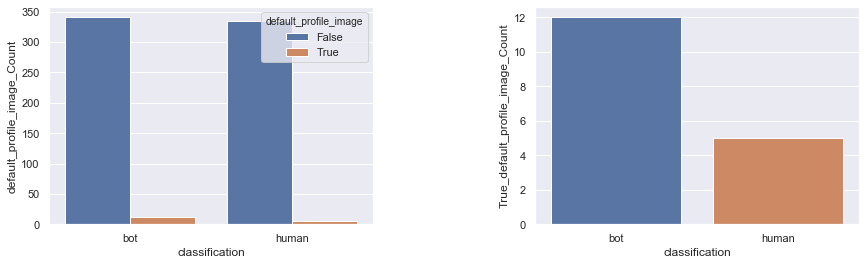

In [609]:
fig, axs = plt.pyplot.subplots(1,2);
plt.pyplot.subplots_adjust(wspace = 0.5, right = 2);

sns.barplot(x= 'classification', y= 'default_profile_image_Count',hue='default_profile_image', ax = axs[0], data = 
    (
        df_twitter_users
        .groupby(['classification','default_profile_image'])
        .agg(default_profile_image_Count = ('default_profile_image', 'count'))
        .reset_index()
    )
);

sns.barplot(x= 'classification', y= 'True_default_profile_image_Count', ax = axs[1], data = 
    (
        df_twitter_users
        .query('default_profile_image == True')
        .groupby(['classification','default_profile_image'])
        .agg(True_default_profile_image_Count = ('default_profile_image', 'count'))
        .reset_index()
    )
);

###### Bots e Humanos personalizam a imagem do perfil na maioria das vezes, porém, separando os perfis que não persoanlizam, os bots se destacam.

## favourites_count
#### The number of Tweets this user has liked in the account’s lifetime

In [610]:
df_twitter_users['favourites_count'].describe()

count       693.000000
mean      15313.503608
std       37376.824828
min           0.000000
25%        1493.000000
50%        4851.000000
75%       14772.000000
max      564333.000000
Name: favourites_count, dtype: float64

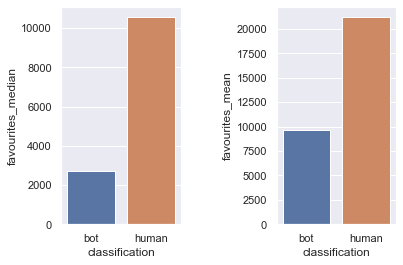

In [611]:
fig, axs = plt.pyplot.subplots(1,2);
plt.pyplot.subplots_adjust(wspace = 0.8);

# Mediana
sns.barplot(x= 'classification', y= 'favourites_median', ax=axs[0],
    data=(df_twitter_users
              .groupby(['classification'])
              .agg(favourites_median = ('favourites_count','median'))
              .reset_index()
        )
    );

# Media
sns.barplot(x= 'classification', y= 'favourites_mean', ax=axs[1],
    data=(df_twitter_users
              .groupby(['classification'])
              .agg(favourites_mean = ('favourites_count','mean'))
              .reset_index()
        )
    );

# Profile description (The user-defined UTF-8 string describing their account)
#### Relação de Bots e humanos que preenchem a descrião do perfil

In [612]:
# Cria coluna empty_profile (quando branco = True)

df_twitter_users = (df_twitter_users
    .assign(empty_profile = np.where(df_twitter_users['description'] == '', True, False))
)

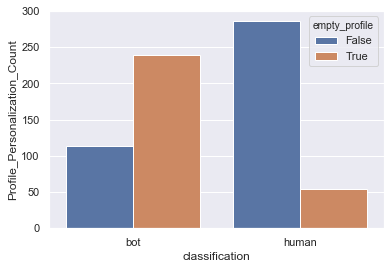

In [613]:
sns.barplot(x= 'classification', y= 'Profile_Personalization_Count',hue='empty_profile' ,data = 
(
    df_twitter_users
    .groupby(['classification','empty_profile'])
    .agg(Profile_Personalization_Count = ('empty_profile', 'count'))
    .reset_index()
)
           );

## URL
#### A URL provided by the user in association with their profile

In [614]:
# Cria coluna url_provided True quando <> nulo

df_twitter_users =(
    df_twitter_users
    .assign(url_provided = (np.where(df_twitter_users['url'].isnull(), False, True)))
)

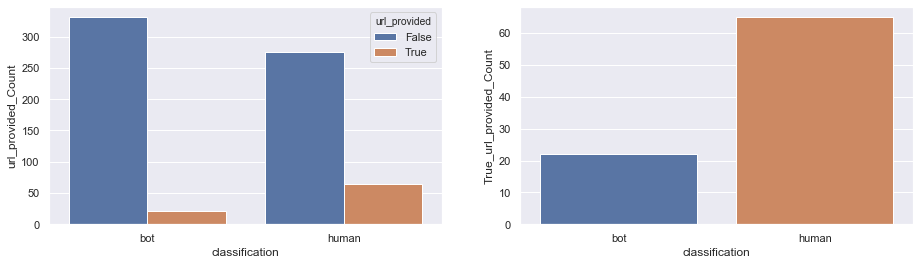

In [623]:
fig, axs = plt.pyplot.subplots(1,2);
plt.pyplot.subplots_adjust(wspace = 0.2, left=6, right=8);

sns.barplot(x= 'classification', y= 'url_provided_Count', hue='url_provided', ax = axs[0] ,data = 
    (
        df_twitter_users
        .groupby(['classification','url_provided'])
        .agg(url_provided_Count = ('url_provided', 'count'))
        .reset_index()
    )
);

sns.barplot(x= 'classification', y= 'True_url_provided_Count', ax = axs[1] ,data = 
    (
        df_twitter_users
        .query('url_provided == True')
        .groupby(['classification','url_provided'])
        .agg(True_url_provided_Count = ('url_provided', 'count'))
        .reset_index()
    )
);

###### Bots e Humanos não costumam informar URL no perfil, porém, humanos informam URL mais do que bots .

## friends_count
#### The number of users this account is following (AKA their “followings”)

In [616]:
df_twitter_users['friends_count'].describe()

count      693.000000
mean       944.694084
std       3786.378031
min          0.000000
25%        118.000000
50%        387.000000
75%        845.000000
max      82900.000000
Name: friends_count, dtype: float64

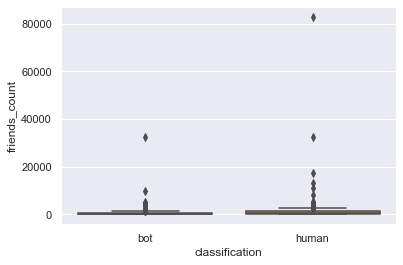

In [644]:
sns.boxplot(x=df_twitter_users['classification'], y=df_twitter_users['friends_count']);

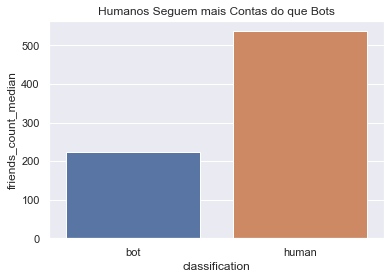

In [618]:
sns.barplot(x= 'classification', y= 'friends_count_median', data =
    (
        df_twitter_users
            .groupby(['classification'])
            .agg(friends_count_median = ('friends_count','median'))
            .reset_index()
    )
).set_title('Humanos Seguem mais Contas do que Bots');

In [619]:
# Novo dataset sem os grandes outliers

df_twitter_users_no_outliers_1 = df_twitter_users.query('followers_count < 50000 and friends_count < 20000')
df_twitter_users_no_outliers_2 = df_twitter_users.query('followers_count < 1000 and friends_count < 1000')

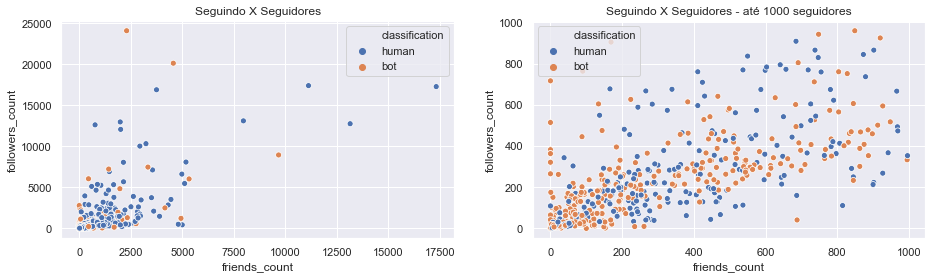

In [620]:
fig, axs = plt.pyplot.subplots(1,2);
plt.pyplot.subplots_adjust(wspace = 0.2, left=6, right=8);

sns.scatterplot(y=df_twitter_users_no_outliers_1['followers_count'], 
                x=df_twitter_users_no_outliers_1['friends_count'], 
                hue = df_twitter_users['classification'],
               ax = axs[0]).set_title('Seguindo X Seguidores');

sns.scatterplot(y=df_twitter_users_no_outliers_2['followers_count'], 
                x=df_twitter_users_no_outliers_2['friends_count'], 
                hue = df_twitter_users['classification'],
               ax = axs[1]).set_title('Seguindo X Seguidores - até 1000 seguidores');


## listed_count
#### The number of public lists that this user is a member of

In [634]:
df_twitter_users['listed_count'].describe()

count     693.000000
mean       39.043290
std       358.638689
min         0.000000
25%         0.000000
50%         1.000000
75%         8.000000
max      8390.000000
Name: listed_count, dtype: float64

In [643]:
sns.
(
    df_twitter_users
        .groupby('classification')
        .agg(list_count = ('listed_count','mean'))
        .reset_index()
)

,classification,list_count
0,bot,38.679887
1,human,39.420588
